In [668]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)


#Step 1: identifying missing values
sal= "SELECT * FROM Salaries"
sal_data = pandas.read_sql(sal, conn)
print("\nNull values in Salaries:\n", sal_data.isnull().sum())
print("\nUnique Year values in Salaries:\n", sal_data['yearID'].unique())
print("\nUnique Team values in Salaries:\n", team_data['teamID'].unique())


team= "SELECT * FROM Teams"
team_data = pandas.read_sql(team, conn)
print("\nNull values in Teams:\n", team_data.isnull().sum())
print("\nUnique Year values in Teams:\n", team_data['yearID'].unique())
print("\nUnique Team values in Teams:\n", team_data['teamID'].unique())


###########################
##Problem 1
#############################


#Considering data of years 1990-2014 as dataset prior to 1990 gets a little sparse
#step 2: Pull out data from SQL database table "Salaries" for years 1990 to 2014, grouping data by year and team. Table Data
#is sorted with respect to year.
#step 3: Creating a virtual column with the sum of salaries in a group identified by same year and team combination,
#creating a Dataframe of SQL Data using pandas library

salary_query = '''SELECT yearID,teamID,lgID,sum(salary) as total_payroll FROM Salaries where yearID>=1990 and yearID<=2014
                    GROUP BY yearID,teamID ORDER BY yearID'''
salaries = pandas.read_sql(salary_query, conn)

#step 4: Pull out data from SQL database table "Teams" for years 1990 to 2014, grouping data by year and team. Table Data
#is sorted with respect to year.
#step 5: Computing winning percentage by using SQL table data of games played and games won by each team in each year.
#Creating a virtual column with the winning percentage computed values catogarized by groups identified by same year and 
#team combination, and then creating a Dataframe of SQL Data using pandas library

win_query = '''SELECT yearID,teamID,franchID,lgID,G,W,L,((W*1.0/G) *100 ) as win_percent FROM Teams where yearID>=1990 and 
                    yearID<=2014 GROUP BY yearID,teamID ORDER BY yearID'''
wins = pandas.read_sql(win_query, conn)

##Merging the two Data Frames from Salaries and Teams on multiple columns of Year and TeamID to get the integrated data
#of each team, its payroll, its wins extra.
salary_wins=pd.merge(wins, salaries[['yearID', 'teamID','total_payroll']], on=['yearID', 'teamID'])
salary_wins

'''
################################
Explanation: 
missing data handling:
>We observe that data for years "1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884" 
is missing in Salary table. Therefore we did inner join between the two Tables Teams and Salary to get data for only 
common years.
>There is missing data (null values) only in few columns like divID,Ghome,DivWin,WCWin extra.., the columns of tables 
Teams and Salaries which we are processing are not having any null values. 
>Data of Wins column was multiplied by a float 1.0 to get the division and percentage value correctly.

'''
print(wins.isnull().sum())
print(salaries.isnull().sum())
print(salary_wins.isnull().sum())
salary_wins



Null values in Salaries:
 yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

Unique Year values in Salaries:
 [1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014]

Unique Team values in Salaries:
 ['BS1' 'CH1' 'CL1' 'FW1' 'NY2' 'PH1' 'RC1' 'TRO' 'WS3' 'BL1' 'BR1' 'BR2'
 'MID' 'WS4' 'BL4' 'ELI' 'PH2' 'WS5' 'CH2' 'HR1' 'KEO' 'NH1' 'PH3' 'SL1'
 'SL2' 'WS6' 'BSN' 'CHN' 'CN1' 'HAR' 'LS1' 'NY3' 'PHN' 'SL3' 'IN1' 'ML2'
 'PRO' 'BFN' 'CL2' 'SR1' 'TRN' 'WOR' 'DTN' 'BL2' 'CN2' 'LS2' 'PH4' 'PT1'
 'SL4' 'CL5' 'NY4' 'NY1' 'PHI' 'BR3' 'IN2' 'RIC' 'TL1' 'WS7' 'ALT' 'BLU'
 'BSU' 'CHU' 'CNU' 'KCU' 'MLU' 'PHU' 'SLU' 'SPU' 'WIL' 'WSU' 'SL5' 'KCN'
 'WS8' 'CL3' 'IN3' 'PIT' 'KC2' 'CL6' 'CL4' 'BL3' 'BR4' 'RC2' 'SR2' 'TL2'
 'BRO' 'CIN' 'BFP' 'BRP' 'BSP' 'CHP' 'CLP' 'NYP' 'PHP' 'PTP' 'BS2' 'CN3'
 'ML3' 'WS9' 'BLN' 'LS3' 'SLN' 'WAS' 'BLA' 'BOS' 'CHA' 'CLE' 'DET' 'MLA'
 'PHA' 'WS1

,yearID,teamID,franchID,lgID,G,W,L,win_percent,total_payroll
0,1990,ATL,ATL,NL,162,65,97,40.123457,14555501.0
1,1990,BAL,BAL,AL,161,76,85,47.204969,9680084.0
2,1990,BOS,BOS,AL,162,88,74,54.320988,20558333.0
3,1990,CAL,ANA,AL,162,80,82,49.382716,21720000.0
4,1990,CHA,CHW,AL,162,94,68,58.024691,9491500.0
5,1990,CHN,CHC,NL,162,77,85,47.530864,13624000.0
6,1990,CIN,CIN,NL,162,91,71,56.172840,14370000.0
7,1990,CLE,CLE,AL,162,77,85,47.530864,14487000.0
8,1990,DET,DET,AL,162,79,83,48.765432,17593238.0
9,1990,HOU,HOU,NL,162,75,87,46.296296,18330000.0


     payroll_mean_over_the_years
NYA                 1.278693e+08
LAA                 1.184672e+08
BOS                 9.463517e+07
LAN                 8.641150e+07
PHI                 7.698738e+07
NYN                 7.562031e+07
ATL                 7.242608e+07
CHN                 7.167308e+07
WAS                 7.153600e+07
ARI                 7.117501e+07
SLN                 6.852890e+07
DET                 6.833500e+07
CHA                 6.621212e+07
SFN                 6.577765e+07
SEA                 6.572747e+07
TEX                 6.550220e+07
MIA                 6.450560e+07
BAL                 6.279722e+07
MIL                 6.165653e+07
TOR                 6.041877e+07
COL                 5.881412e+07
ANA                 5.851150e+07
CIN                 5.541069e+07
CLE                 5.456441e+07
HOU                 5.393211e+07
MIN                 4.885329e+07
OAK                 4.522930e+07
TBA                 4.518299e+07
SDN                 4.481044e+07
KCA       

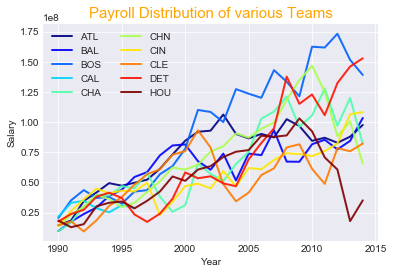

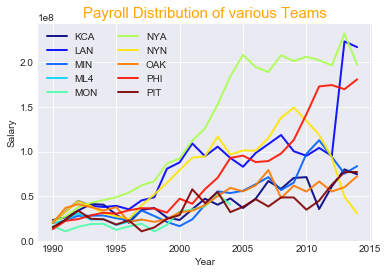

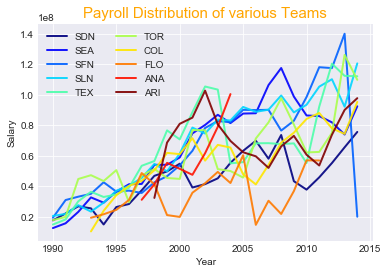

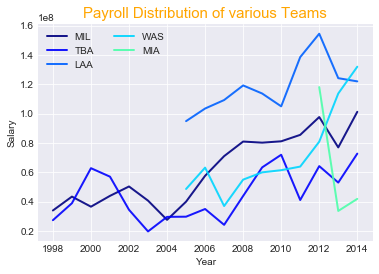

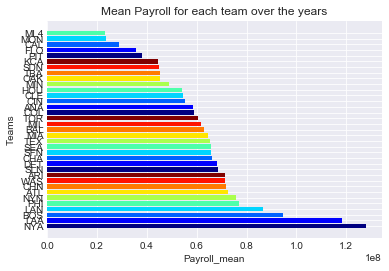

In [670]:
###############################
###Problem 2
###############################


#team list
team_names=salary_wins['teamID'].unique()

payroll_dist=pd.DataFrame(salary_wins['yearID'].unique(),columns=['yearID'])
payroll_dist.astype({'yearID': 'int32'}).dtypes

for i in team_names:
    team_payroll=salary_wins.loc[salary_wins['teamID'] == i][['yearID','total_payroll']]
    team_payroll.rename(columns={'total_payroll':i},inplace=True)
    team_payroll.astype({'yearID': 'int32'}).dtypes
    dataframe=pd.merge(payroll_dist, team_payroll, on=['yearID'],how='outer')
    payroll_dist=dataframe


#multiple line plot
#color_palette
n = 10
colors = plt.cm.jet(np.linspace(0,1,n))
#plot style
plt.style.use('seaborn-darkgrid')

index=0
for i in team_names[:10]:
    plt.plot( 'yearID', i, data=payroll_dist, marker='', color=colors[index], linewidth=2, alpha=0.9, label=i)
    index=index+1

plt.legend(loc=2, ncol=2)
#Axes and title
plt.title("Payroll Distribution of various Teams", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Salary")

plt.figure()
##########################################\


index=0
for i in team_names[10:20]:
    plt.plot( 'yearID', i, data=payroll_dist, marker='', color=colors[index], linewidth=2, alpha=0.9, label=i)
    index=index+1
    

plt.legend(loc=2, ncol=2)
#Axes and title
plt.title("Payroll Distribution of various Teams", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Salary")

plt.figure()
######################


index=0
for i in team_names[20:30]:
    plt.plot( 'yearID', i, data=payroll_dist, marker='', color=colors[index], linewidth=2, alpha=0.9, label=i)
    index=index+1

plt.legend(loc=2, ncol=2)
# Axes and title
plt.title("Payroll Distribution of various Teams", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Salary")

plt.figure()
################################


index=0
for i in team_names[30:36]:
    plt.plot( 'yearID', i, data=payroll_dist, marker='', color=colors[index], linewidth=2, alpha=0.9, label=i)
    index=index+1
    

plt.legend(loc=2, ncol=2)
# Axes and title
plt.title("Payroll Distribution of various Teams", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Salary")

plt.figure()




####################
#Question 1: Answer 1 (statements)
#######################
'''
plot details:
Payroll Distribution graphs plots the values of actual payroll of each team every year from 1990 to 2015

1>For most of the teams there is an increase in the payroll over the years some teams show exponential increase
and some show slow increase
2>The Payroll has gone very high in time period after 2005 for few teams like ATL, DET, NYA, LAN, PHI extra, thus 
spread or range of their payroll distribution is very large compared to other few teams whose increase in payroll
is not that high like teams PIT, OAK, KCA therefore spread of their distribution is not that large.
3>The mean payroll and median payroll for each team over the period of 25years varies a lot. Most of the teams have 
an average payroll in figures of 6.279722e+07. The mean payroll distribution for each team over the 25 years is 
skewed to one side.

'''
#####################
#Problem 3 Plot about the statement
#########################

payroll_mean=pd.DataFrame(payroll_dist.mean(axis=0))
payroll_mean.rename(columns={0:'payroll_mean_over_the_years'},inplace=True)
payroll_mean=payroll_mean.drop('yearID')
payroll_mean_sorted = payroll_mean.sort_values('payroll_mean_over_the_years',ascending=False)
print(payroll_mean_sorted)
print(payroll_mean.mean(axis=0))

payroll_median=pd.DataFrame(payroll_dist.median(axis=0))
payroll_median.rename(columns={0:'payroll_median_over_the_years'},inplace=True)
payroll_median=payroll_median.drop('yearID')
print(payroll_median)
print(payroll_median.median(axis=0))

'''
plot details:
Making a bar graph of the mean payroll value for each team over the 25 years 1990 to 2015. of time period supporting statement "The mean payroll and 
median payroll for each team over the period of 25years varies a lot. Most of the teams have 
an average payroll in figures of 6.279722e+07. The mean payroll distribution for each team over the 25 years is 
skewed to one side.
'''

payroll_mean = payroll_mean_sorted['payroll_mean_over_the_years']
bars = payroll_mean_sorted.index
y_pos = np.arange(len(bars))

# Create bars and choose color
plt.barh(y_pos, payroll_mean, color=colors)

# Add title and axis names
plt.title('Mean Payroll for each team over the years')
plt.xlabel('Payroll_mean')
plt.ylabel('Teams')

# Create names
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()




'\n##########################\nQuestion 2: Answer 2\n#########################\nplot details:\nScatter plot showing relation between actual payroll and winning percentage for each team during different time frames\n\n1> Payrolls increased over the years, from an order of 1e+07 to 2.5e+08, very high payrolls give the same winning\npercentage\n2> Outliers(statements about teams that stand out): All the teams have very different payroll and winning percentages in \nlater years after 2000. plot shows a lot of outlier teams over the regression line. Teams start offering varied \npayrolls and get varied winning chances. Yes there is NYA team that standout as being particularly good at paying for \nhigh wining percentage across most of time periods. \n3>OAK: OAK shows the most efficient payroll in the time frame 2000-2004 over others, later it does get few competitors but\nstill has a good spending efficiency as it maintains a good winning percentage with low salary payroll. \n\n'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

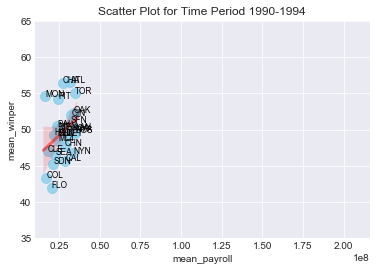

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


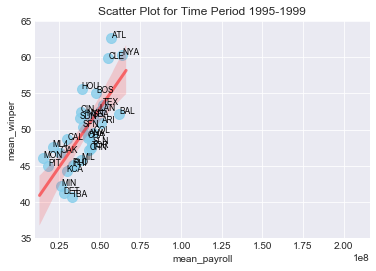

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


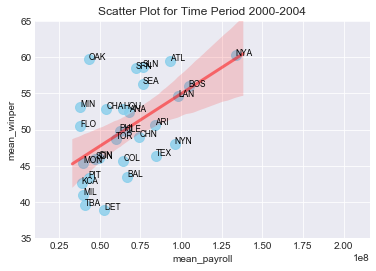

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


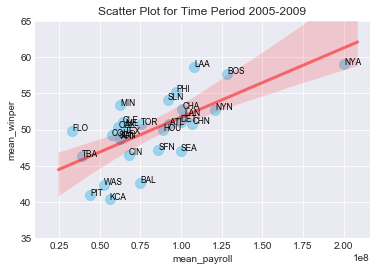

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


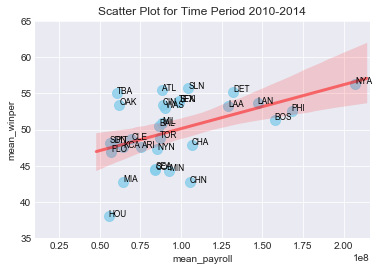

<Figure size 432x288 with 0 Axes>

In [671]:
#######################
#Problem 4  scatter plot for each time period 
########################

salary_wins

bins = [1989, 1994, 1999, 2004,2009, 2014]
#Required: 1990-1994, 1995-1999, 2000-2004, 2005-2009, 2010-2014.Bins formed "[(1989, 1994] < (1994, 1999] < (1999, 2004] < (2004, 2009] < (2009, 2014]]", notice which limit is inclusive and which is exclusive

salary_wins['time_bins']=pd.cut(salary_wins['yearID'],bins,labels=["1990-1994", "1995-1999", "2000-2004","2005-2009","2010-2014"])

######################################
#Making a list of all 5 Dataframes with different time bins.

Dataframe_time_list=[]
time_frames=["1990-1994", "1995-1999", "2000-2004","2005-2009","2010-2014"]
for i in time_frames:
    Dataframe_time_list.append(salary_wins.loc[salary_wins['time_bins'] == i])

idx=0
for i in Dataframe_time_list:
    mean_win_percent=[]
    mean_payroll=[]

    for tm in team_names:
        mean_win_percent.append(i.loc[i['teamID']==tm].mean()['win_percent'])
        mean_payroll.append(i.loc[i['teamID']==tm].mean()['total_payroll'])

    df_win_payroll = pd.DataFrame(list(zip(team_names, mean_win_percent,mean_payroll)), 
               columns =['team', 'mean_winper','mean_payroll'])
    df_win_payroll

    #Mean winning percentage (y-axis) vs. Mean payroll (x-axis) for each team. Each team corresponds to a dot
    #Scatter plot

    plot=sns.regplot(data=df_win_payroll, x='mean_payroll', y='mean_winper', marker="o", color="skyblue",  scatter_kws={'s':100}, line_kws={"color":"r","alpha":0.5,"lw":3})
 
    #Add annotations one by one with a loop
    for line in range(0,df_win_payroll.shape[0]):
        plot.text(df_win_payroll.mean_payroll[line]+0.1, df_win_payroll.mean_winper[line], df_win_payroll.team[line], horizontalalignment='left', size='small', color='black')
    #Keeping Limits same for the plots for better interpretation
    plt.ylim(35, 65)
    plt.xlim(0.1e+08, 2.16e+08)

    plt.title('Scatter Plot for Time Period '+time_frames[idx])
    idx=idx+1
    plt.figure()

############################
'''
##########################
Question 2: Answer 2
#########################
plot details:
Scatter plot showing relation between actual payroll and winning percentage for each team during different time frames

1> Payrolls increased over the years, from an order of 1e+07 to 2.5e+08, very high payrolls give the same winning
percentage
2> Outliers(statements about teams that stand out): All the teams have very different payroll and winning percentages in 
later years after 2000. plot shows a lot of outlier teams over the regression line. Teams start offering varied 
payrolls and get varied winning chances. Yes there is NYA team that standout as being particularly good at paying for 
high wining percentage across most of time periods. 
3>OAK: OAK shows the most efficient payroll in the time frame 2000-2004 over others, later it does get few competitors but
still has a good spending efficiency as it maintains a good winning percentage with low salary payroll. 

'''

'\n###########################\n#Question 3: Answer3\n#############################\nplot details:\nScatter plot showing relation between the transformed payroll that is the standardized payroll value and winning percentage \nfor each team during different time frames\n\n1> Both the graphs in Problem 4 and 6 are similar as they show a relationship between same variables winning percentage \nand paryroll. Problem 4 graphs are with the actual payroll values and Problem 6 uses the standardized payroll so our \nx axis gets transformed.\n2> We transform the payroll value by standardizing payroll for each team with respect to the mean payroll value for that year.\nThus we obtain positive and negative values according to the positioning of the team payroll values w.r.t. the mean payroll\nof the year, changing the range of the values on the x axis(positive and negative).\n3>Interpretation becomes easier and the graph becomes cleaner with this payroll transformation. Although the interpretation

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

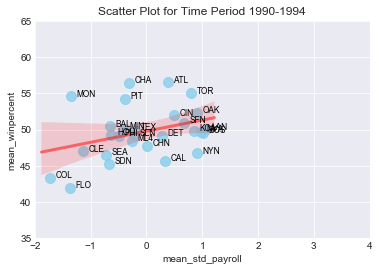

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


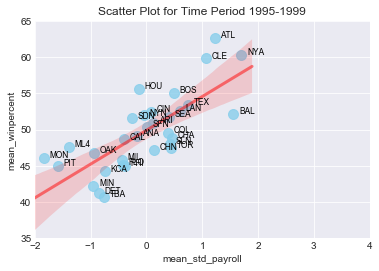

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


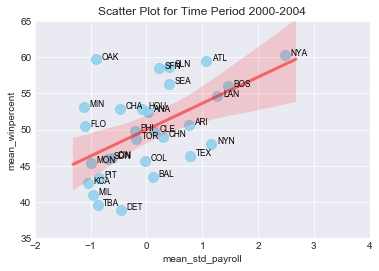

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


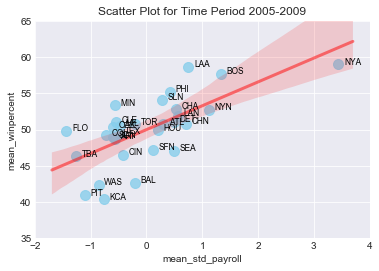

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


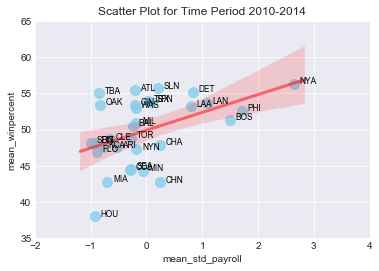

<Figure size 432x288 with 0 Axes>

In [676]:
##########################
#Problem 5   Standardizing Payroll
##########################


years=salary_wins['yearID'].unique()
#print(years)

#Dictionaries of avg payroll and standard deviation of payroll every year.
avg_payroll_years={}
std_payroll_years={}
for i in years:
    avg_payroll_years[i]=salary_wins[salary_wins['yearID']==i].describe()['total_payroll']['mean']
    std_payroll_years[i]=salary_wins[salary_wins['yearID']==i].describe()['total_payroll']['std']

standard_payroll=[]

for i in years:
    payroll_team_year=salary_wins[salary_wins['yearID']==i]['total_payroll']
    standardize_payroll_year=[]
    for j in payroll_team_year:
        standardize_payroll_year.append((j-avg_payroll_years[i])/std_payroll_years[i])
    standard_payroll.append(standardize_payroll_year)


std_payroll=[]
for i in standard_payroll:
    std_payroll.extend(i)

salary_wins['std_payroll']=pd.Series(std_payroll)
salary_wins


####################################
#Problem 6
###################################


#Making a list of all 5 Dataframes with different time bins.
std_payroll_dataframe_time_list=[]
for i in time_frames:
    std_payroll_dataframe_time_list.append(salary_wins.loc[salary_wins['time_bins'] == i])

idx=0 #index, iterating variable
for i in std_payroll_dataframe_time_list:
    mean_win_percent=[]
    mean_std_payroll=[]

    for tm in team_names:
        mean_win_percent.append(i.loc[i['teamID']==tm].mean()['win_percent'])
        mean_std_payroll.append(i.loc[i['teamID']==tm].mean()['std_payroll'])

    df_win_stdpayroll = pd.DataFrame(list(zip(team_names, mean_win_percent,mean_std_payroll)), 
               columns =['team', 'mean_winpercent','mean_std_payroll'])
    df_win_stdpayroll

    #Mean winning percentage (y-axis) vs. Mean standard_payroll (x-axis) for each team. Each team corresponds to a dot
    #Scatter plot
    plot=sns.regplot(data=df_win_stdpayroll, x='mean_std_payroll', y='mean_winpercent', marker="o", color="skyblue",  scatter_kws={'s':100}, line_kws={"color":"r","alpha":0.5,"lw":3})
 
    #Add annotations one by one with a loop
    for line in range(0,df_win_stdpayroll.shape[0]):
        plot.text(df_win_stdpayroll.mean_std_payroll[line]+0.1, df_win_stdpayroll.mean_winpercent[line], df_win_stdpayroll.team[line], horizontalalignment='left', size='small', color='black')
    #Keeping Limits same for the plots for better interpretation
    plt.ylim(35, 65)
    plt.xlim(-2, 4)

    plt.title('Scatter Plot for Time Period '+time_frames[idx])
    idx=idx+1
    plt.figure()

############################

'''
###########################
#Question 3: Answer3
#############################
plot details:
Scatter plot showing relation between the transformed payroll that is the standardized payroll value and winning percentage 
for each team during different time frames

1> Both the graphs in Problem 4 and 6 are similar as they show a relationship between same variables winning percentage 
and paryroll. Problem 4 graphs are with the actual payroll values and Problem 6 uses the standardized payroll so our 
x axis gets transformed.
2> We transform the payroll value by standardizing payroll for each team with respect to the mean payroll value for that year.
Thus we obtain positive and negative values according to the positioning of the team payroll values w.r.t. the mean payroll
of the year, changing the range of the values on the x axis(positive and negative).
3>Interpretation becomes easier and the graph becomes cleaner with this payroll transformation. Although the interpretations
from the graphs are same as those defined in Problem 4. We definitely see OAK best spending efficiency in 2000-2004.

'''



'\nplot details:\nScatter plot showing relation : winning percentage vs standardized payroll over the 25 years period\n\nThe regression line gives winning percentage as a function of standardized payroll. from the regression line, teams \nthat spend roughly the average payroll in a given year will win 50% of their games \n(i.e. win_pct is 50 when standardized_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll\n(i.e., win_pct is 55 when standardized_payroll is 2). Definitely the slope of the regression line comes out to be 2.5.\n\n'

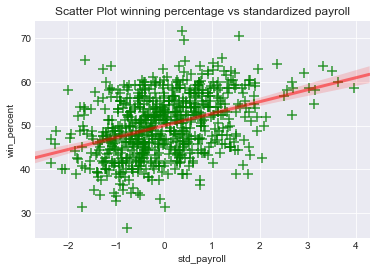

<Figure size 432x288 with 0 Axes>

In [673]:
########################################
#Problem 7 Single Scatter plot winning percentage vs standardized payroll.
###################################

salary_wins

plot=sns.regplot(data=salary_wins, x='std_payroll', y='win_percent', marker="+", color="green",  scatter_kws={'s':100}, line_kws={"color":"r","alpha":0.5,"lw":3})

plt.title('Scatter Plot winning percentage vs standardized payroll')
plt.figure()

'''
plot details:
Scatter plot showing relation : winning percentage vs standardized payroll over the 25 years period

The regression line gives winning percentage as a function of standardized payroll. from the regression line, teams 
that spend roughly the average payroll in a given year will win 50% of their games 
(i.e. win_pct is 50 when standardized_payroll is 0), and teams increase 5% wins for every 2 standard units of payroll
(i.e., win_pct is 55 when standardized_payroll is 2). Definitely the slope of the regression line comes out to be 2.5.

'''

'\n###########################\nQuestion 4: Answer 4:\n#############################\nplot details:\nline graph shows the trend of spending efficiency of each team over the 25 years period\n\n1>We see that efficiency of NYA is less, and in the plots of ques2/3 it shows NYA has been paying a lot to its players\nevery year. NYA payroll increases a lot in later years 2000-2015 thus we see the efficiency of NYA keeps on decreasing \nafter 2000.\n2>Conversely Oakland efficiency is very good in the MoneyBall period. Oakland shows very low payroll and a very high \nefficiency after 2000.\n\n'

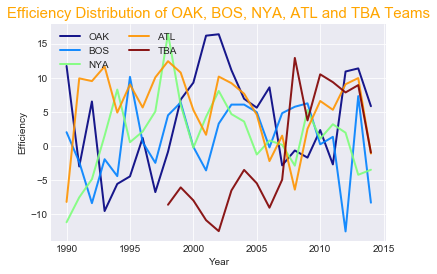

<Figure size 432x288 with 0 Axes>

In [674]:
#####################################
#Problem 8 Line plot
###################################

#Calculating expected winning percentage using regression line quation
expected_win_pct=[]
for i in salary_wins['std_payroll']:
    expected_win_pct.append(50+(2.5*i))

salary_wins['expected_win_pct']=pd.Series(expected_win_pct)
salary_wins

#Spending efficiency calculation for each team
win_efficiency=[]
for i in range(len(salary_wins['win_percent'])):
    win_efficiency.append(salary_wins['win_percent'][i]-salary_wins['expected_win_pct'][i])

salary_wins['win_efficiency']=pd.Series(win_efficiency)
salary_wins

'''
Making a line plot with year on the x-axis and efficiency on the y-axis. The set of teams plot are 
Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).

'''
win_efficiency_dist=pd.DataFrame(salary_wins['yearID'].unique(),columns=['yearID'])
win_efficiency_dist.astype({'yearID': 'int32'}).dtypes

interesting_teams=['OAK', 'BOS', 'NYA', 'ATL', 'TBA']

for i in interesting_teams:
    team_efficiency=salary_wins.loc[salary_wins['teamID'] == i][['yearID','win_efficiency']]
    team_efficiency.rename(columns={'win_efficiency':i},inplace=True)
    team_efficiency.astype({'yearID': 'int32'}).dtypes
    dataframe_eff=pd.merge(win_efficiency_dist, team_efficiency, on=['yearID'],how='outer')
    win_efficiency_dist=dataframe_eff

#multiple teams line plot
#color_palette
n = 5
colors = plt.cm.jet(np.linspace(0,1,n))
#plot style
plt.style.use('seaborn-darkgrid')

indx=0 #index just an iterating variable
for i in interesting_teams:
    plt.plot( 'yearID', i, data=win_efficiency_dist, marker='', color=colors[indx], linewidth=2, alpha=0.9, label=i)
    indx=indx+1

plt.legend(loc=2, ncol=2)

# Axes and title
plt.title("Efficiency Distribution of OAK, BOS, NYA, ATL and TBA Teams", loc='center', fontsize=15, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Efficiency")

plt.figure()

'''
###########################
Question 4: Answer 4:
#############################
plot details:
line graph shows the trend of spending efficiency of each team over the 25 years period

1>We see that efficiency of NYA is less, and in the plots of ques2/3 it shows NYA has been paying a lot to its players
every year. NYA payroll increases a lot in later years 2000-2015 thus we see the efficiency of NYA keeps on decreasing 
after 2000.
2>Conversely Oakland efficiency is very good in the MoneyBall period. Oakland shows very low payroll and a very high 
efficiency after 2000.

'''
